In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
%%time
CT_data = pd.read_csv("20191015_ClinicalTrials_mesenchymal+stem+cell.csv")
CT_data.head(10)

Wall time: 18.2 ms


,NCTNumber,Title,Acronym,Status,Conditions,Interventions,OutcomeMeasures,Sponsor/Collaborators,Gender,Age,...,PrimaryCompletionDate,CompletionDate,FirstPosted,ResultsFirstPosted,LastUpdatePosted,Locations,Rank,StudyDocuments,StudyResults,URL
0,NCT04073472,Mesenchymal Stem Cells for the Treatment of Po...,IPAAF,Not yet recruiting,"Crohn's Disease|Fistula|Anal Fistula|Pouch, Il...",Drug: mesenchymal stem cells (MSCs),Safety and Feasibility: Number Of Adverse Even...,The Cleveland Clinic,All,"18 Years to 75 Years (Adult, Older Adult)",...,"November 1, 2021","November 1, 2022","August 29, 2019",NaN,"August 29, 2019","Cleveland Clinic, Cleveland, Ohio, United States",1,NaN,No Results Available,https://ClinicalTrials.gov/show/NCT04073472
1,NCT02804945,Mesenchymal Stem Cells (MSCs) for Treatment of...,NaN,Completed,Blood And Marrow Transplantation|Adult Respira...,Biological: Mesenchymal Stem Cells (MSCs),Adverse Events of Participants Treated with Al...,M.D. Anderson Cancer Center|Katz Foundation,All,"18 Years and older (Adult, Older Adult)",...,"June 13, 2019","June 13, 2019","June 17, 2016",NaN,"August 26, 2019","University of Texas MD Anderson Cancer Center,...",2,NaN,No Results Available,https://ClinicalTrials.gov/show/NCT02804945
2,NCT02866721,Safety and Tolerability Study of Allogeneic Me...,CEASE-CF,Recruiting,Cystic Fibrosis,Biological: Mesenchymal Stem Cells,"Dose limiting toxicity (DLT), triggered by occ...",Erica Roesch|Case Western Reserve University|C...,All,"18 Years and older (Adult, Older Adult)",...,December 2019,December 2020,"August 15, 2016",NaN,"February 12, 2019","University Hospitals Cleveland Medical Center,...",3,NaN,No Results Available,https://ClinicalTrials.gov/show/NCT02866721
3,NCT02181712,Mesenchymal Stem Cell Therapy for Lung Rejection,NaN,Recruiting,Lung Transplant Reject|Bronchiolitis Obliterans,Biological: Mesenchymal stem cell 0.5|Biologic...,Number of Participants with serious and non-se...,Mayo Clinic,All,"18 Years to 75 Years (Adult, Older Adult)",...,September 2020,September 2021,"July 4, 2014",NaN,"September 25, 2019","Mayo Clinic in Florida, Jacksonville, Florida,...",4,NaN,No Results Available,https://ClinicalTrials.gov/show/NCT02181712
4,NCT04047810,Mesenchymal Stem Cells in the Treatment of Sub...,NaN,Recruiting,Chronic Obstructive Pulmonary Disease,Biological: Mesenchymal Stem Cells,Adverse Events,Mayo Clinic,All,"40 Years to 65 Years (Adult, Older Adult)",...,"August 16, 2021","August 16, 2021","August 7, 2019",NaN,"October 10, 2019","Mayo Clinic in Florida, Jacksonville, Florida,...",5,NaN,No Results Available,https://ClinicalTrials.gov/show/NCT04047810
5,NCT02484950,Mesenchymal Stem Cell Augmentation in Patients...,NaN,Recruiting,Full Thickness Rotator Cuff Tear,Biological: Mesenchymal stem cell augmentation...,American Shoulder and Elbow Surgeons (ASES) Sc...,Rush University Medical Center,All,"18 Years to 70 Years (Adult, Older Adult)",...,November 2018,November 2020,"June 30, 2015",NaN,"October 25, 2017","Rush University Medical Center, Chicago, Illin...",6,NaN,No Results Available,https://ClinicalTrials.gov/show/NCT02484950
6,NCT02315027,Mesenchymal Stem Cell Therapy in Multiple Syst...,NaN,"Active, not recruiting",MSA,Biological: autologous mesenchymal stem cells,"Adverse event frequency (by severity, type, at...",Mayo Clinic,All,"30 Years to 80 Years (Adult, Older Adult)",...,August 2020,August 2020,"December 11, 2014",NaN,"October 2, 2019","Mayo Clinic in Rochester, Rochester, Minnesota...",7,NaN,No Results Available,https://ClinicalTrials.gov/show/NCT02315027
7,NCT02235844,Allogeneic Human Umbilical Cord Mesenchymal St...,NaN,Completed,Duchenne's Muscular Dystrophy,Biological: Umbilical Cord Mesenchymal Stem Cells,Adverse Events|Change from baseline of weight|...,"Allergy and Asthma Consultants, Wichita, Kansa...",Male,28 Years to 31 Years (Adult),...,"September 30, 2017","September 30, 2017","September 10, 2014",NaN,"September 16, 2019","Asthma and Allergy Consultants, Wichit

In [3]:
# print out all column indices
print(CT_data.columns.values)

['NCTNumber' 'Title' 'Acronym' 'Status' 'Conditions' 'Interventions'
 'OutcomeMeasures' 'Sponsor/Collaborators' 'Gender' 'Age' 'Phases'
 'Enrollment' 'FundedBys' 'StudyType' 'StudyDesigns' 'OtherIDs'
 'StartDate' 'PrimaryCompletionDate' 'CompletionDate' 'FirstPosted'
 'ResultsFirstPosted' 'LastUpdatePosted' 'Locations' 'Rank'
 'StudyDocuments' 'StudyResults' 'URL']


In [4]:
CT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
NCTNumber                201 non-null object
Title                    201 non-null object
Acronym                  49 non-null object
Status                   201 non-null object
Conditions               201 non-null object
Interventions            191 non-null object
OutcomeMeasures          193 non-null object
Sponsor/Collaborators    201 non-null object
Gender                   201 non-null object
Age                      201 non-null object
Phases                   178 non-null object
Enrollment               193 non-null float64
FundedBys                201 non-null object
StudyType                201 non-null object
StudyDesigns             192 non-null object
OtherIDs                 201 non-null object
StartDate                192 non-null object
PrimaryCompletionDate    191 non-null object
CompletionDate           190 non-null object
FirstPosted              201 non-null ob

In [5]:
CT_data.dtypes

NCTNumber                 object
Title                     object
Acronym                   object
Status                    object
Conditions                object
Interventions             object
OutcomeMeasures           object
Sponsor/Collaborators     object
Gender                    object
Age                       object
Phases                    object
Enrollment               float64
FundedBys                 object
StudyType                 object
StudyDesigns              object
OtherIDs                  object
StartDate                 object
PrimaryCompletionDate     object
CompletionDate            object
FirstPosted               object
ResultsFirstPosted        object
LastUpdatePosted          object
Locations                 object
Rank                       int64
StudyDocuments            object
StudyResults              object
URL                       object
dtype: object

In [6]:
# export one row to know the style of the raw data
CT_data.iloc[0]

NCTNumber                                                      NCT04073472
Title                    Mesenchymal Stem Cells for the Treatment of Po...
Acronym                                                              IPAAF
Status                                                  Not yet recruiting
Conditions               Crohn's Disease|Fistula|Anal Fistula|Pouch, Il...
Interventions                          Drug: mesenchymal stem cells (MSCs)
OutcomeMeasures          Safety and Feasibility: Number Of Adverse Even...
Sponsor/Collaborators                                 The Cleveland Clinic
Gender                                                                 All
Age                            18 Years to 75 Years   (Adult, Older Adult)
Phases                                                             Phase 1
Enrollment                                                              15
FundedBys                                                            Other
StudyType                

The following list shows how many nulls in each column. Most clinical trilas don't proivde study documents to the governemtn. The results are also not posted. 

In [7]:
CT_data.isnull().sum()

NCTNumber                  0
Title                      0
Acronym                  152
Status                     0
Conditions                 0
Interventions             10
OutcomeMeasures            8
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                    23
Enrollment                 8
FundedBys                  0
StudyType                  0
StudyDesigns               9
OtherIDs                   0
StartDate                  9
PrimaryCompletionDate     10
CompletionDate            11
FirstPosted                0
ResultsFirstPosted       188
LastUpdatePosted           0
Locations                  0
Rank                       0
StudyDocuments           197
StudyResults               0
URL                        0
dtype: int64

# Exploratory data analysis

## Status of clinical trials based on the gender

First of all, I would linke to understand the status of clinical trials of mesenchymal stem cells. The following plot shows that most clinical trials is still recuriting. The second group is completed. These two groups are way larger than other groups.

Text(0, 0.5, 'Count')

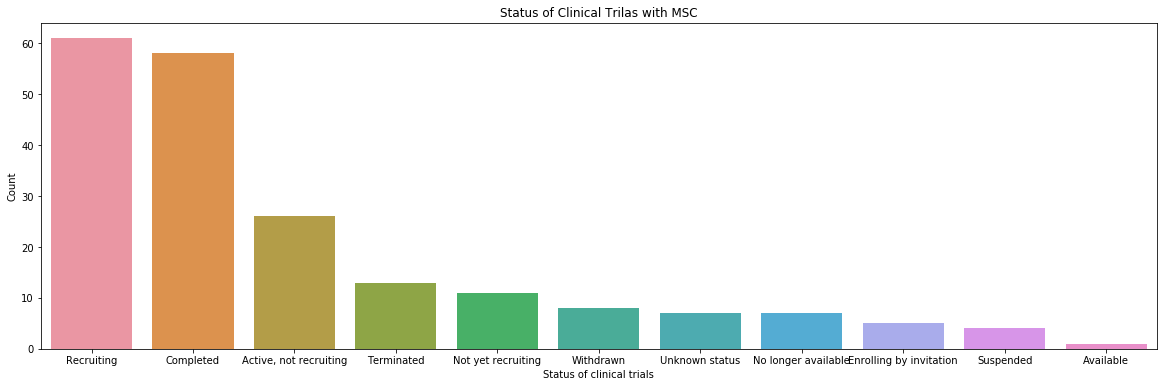

In [8]:
plt.figure(figsize=(20,6))
plt.title("Status of Clinical Trilas with MSC")
sns.countplot(x="Status", data=CT_data, order = CT_data['Status'].value_counts().index)
plt.xlabel('Status of clinical trials')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

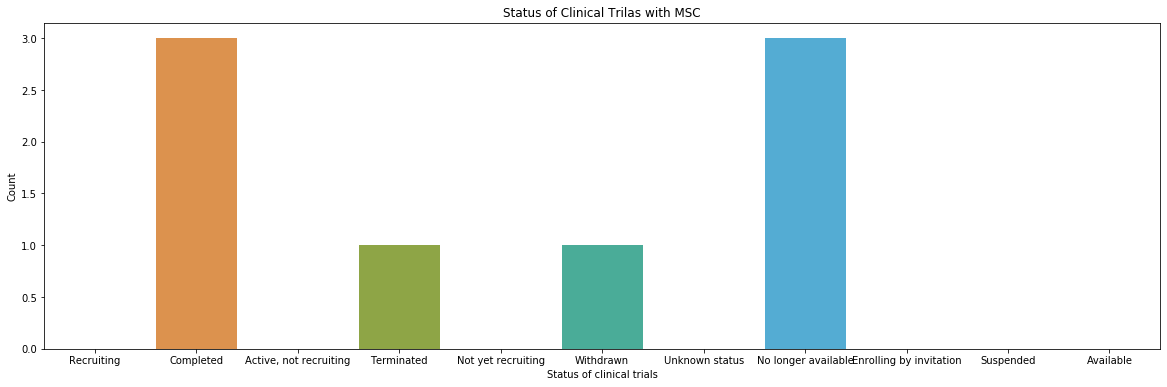

In [9]:
plt.figure(figsize=(20,6))
plt.title("Status of Clinical Trilas with MSC")
sns.countplot(x="Status", data=CT_data[CT_data['Gender'] == 'Male'], order = CT_data['Status'].value_counts().index)
plt.xlabel('Status of clinical trials')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

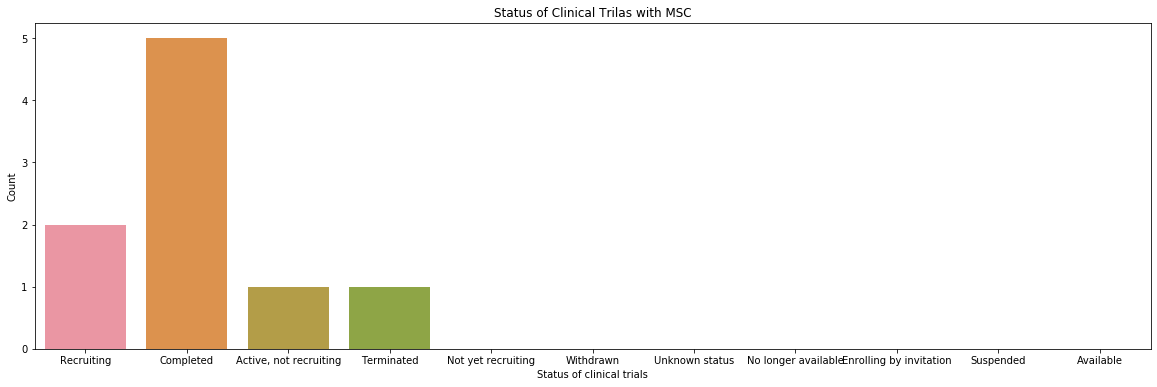

In [10]:
plt.figure(figsize=(20,6))
plt.title("Status of Clinical Trilas with MSC")
sns.countplot(x="Status", data=CT_data[CT_data['Gender'] == 'Female'], order = CT_data['Status'].value_counts().index)
plt.xlabel('Status of clinical trials')
plt.ylabel('Count')

Second, I would like to see the status of clinical trials. It shows that The number of Phase 1 is lager than the summation of phase 2 and 3. In other words, many research groups propose different trials with MSC, but only few of them can enter to Phase 2 and Phase 3.

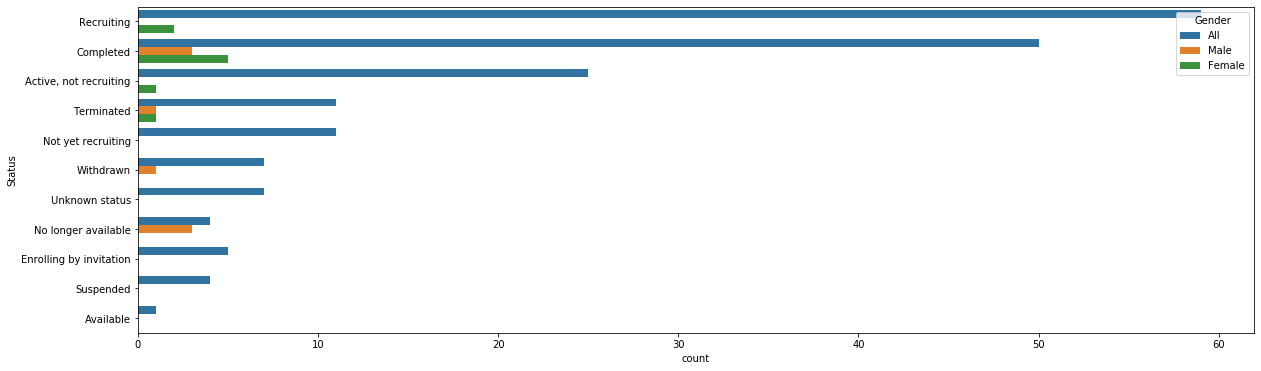

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(y='Status',hue='Gender',data=CT_data, order = CT_data['Status'].value_counts().index)

## Phases of clinical trials

Text(0, 0.5, 'Count')

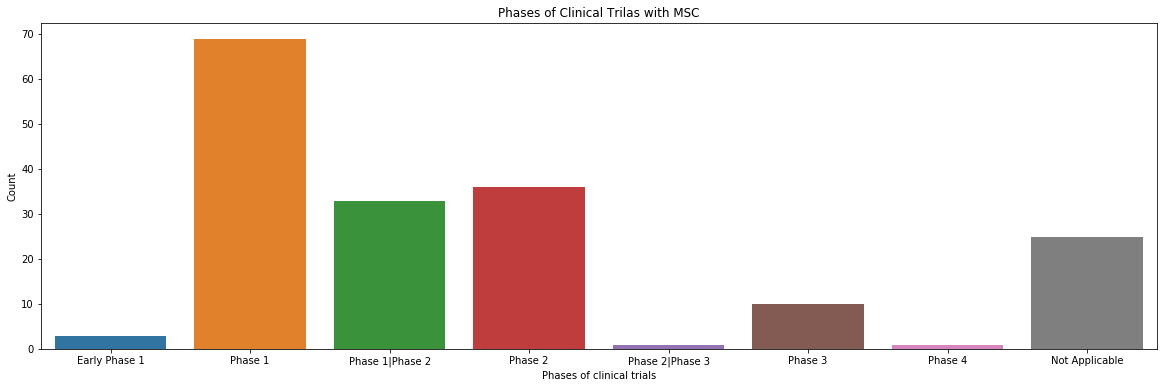

In [12]:
plt.figure(figsize=(20,6))
phase_oreder=['Early Phase 1', 'Phase 1', 'Phase 1|Phase 2', 'Phase 2', 'Phase 2|Phase 3', 'Phase 3', 'Phase 4', 'Not Applicable']
plt.title("Phases of Clinical Trilas with MSC")
sns.countplot(x="Phases", data=CT_data, order=phase_oreder)
plt.xlabel('Phases of clinical trials')
plt.ylabel('Count')

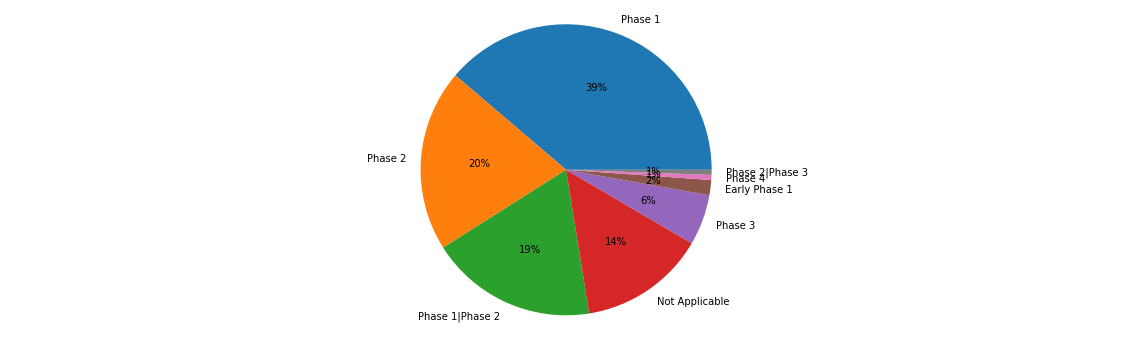

In [13]:
plt.figure(figsize=(20,6))
labels = CT_data['Phases'].value_counts().index
plt.pie(CT_data['Phases'].value_counts(), labels = labels, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

Third, I would like to know how many patients enrolled all phases of clinical trials. It shows tht Phase 3 clinical trilas require most patients to enroll. 

Text(0, 0.5, 'Enrollment')

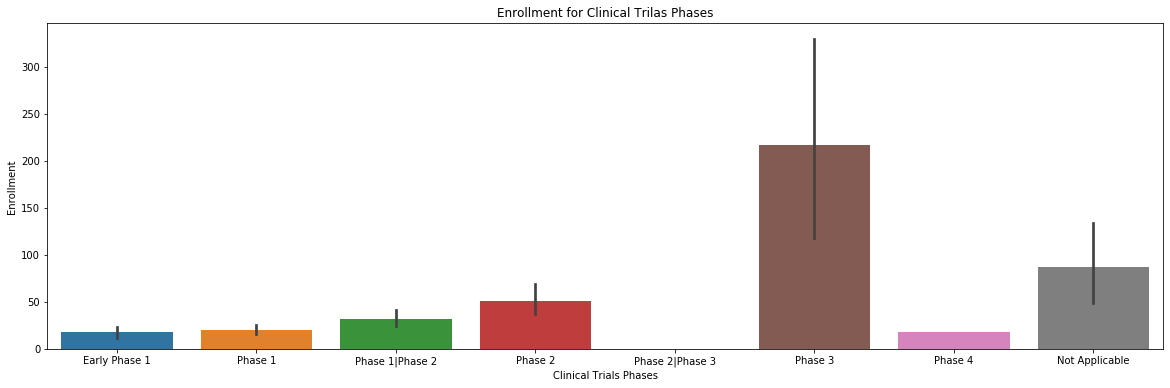

In [14]:
plt.figure(figsize=(20,6))
sns.barplot(x=CT_data['Phases'], y=CT_data['Enrollment'], order=phase_oreder)
plt.title("Enrollment for Clinical Trilas Phases")
plt.xlabel("Clinical Trials Phases")
plt.ylabel("Enrollment")

Forrth, the following plot indicates the funding sources of clinical trails. It shows non-specified funding source is the major population. The second largest source comes from industry. However, another figure displays different relations between fundinf sources and enrollment. Patients prefer to enroll clinical trials with funding from government.

## Funding sources of clinical trials

In [15]:
CT_data['Sponsor/Collaborators'].value_counts()

Mayo Clinic                                           19
Mesoblast International Sàrl|Mesoblast, Ltd.          12
Joshua M Hare|University of Miami                      6
Hope Biosciences                                       5
Longeveron LLC                                         4
                                                      ..
Orthofix Inc.                                          1
Rebecca Torguson|Medstar Health Research Institute     1
Roger Williams Medical Center                          1
Medistem Inc.                                          1
Nature Cell Co. Ltd.                                   1
Name: Sponsor/Collaborators, Length: 134, dtype: int64

In [16]:
CT_data['FundedBys'].value_counts()

Other                 103
Industry               52
Other|NIH              15
Industry|Other          9
Other|Industry          6
Other|NIH|Industry      3
NIH                     3
U.S. Fed                3
Other|U.S. Fed          2
NIH|Industry            1
Industry|NIH            1
U.S. Fed|Other          1
NIH|Other               1
Other|Industry|NIH      1
Name: FundedBys, dtype: int64

Text(0, 0.5, 'Counts')

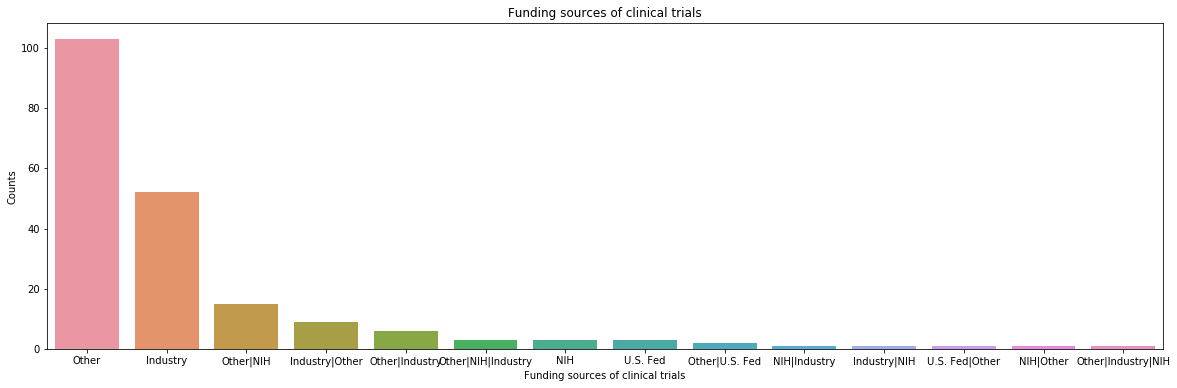

In [17]:
plt.figure(figsize=(20,6))
plt.title('Funding sources of clinical trials')
sns.countplot(x="FundedBys", data=CT_data, order = CT_data['FundedBys'].value_counts().index)
plt.xlabel('Funding sources of clinical trials')
plt.ylabel('Counts')

Text(0, 0.5, 'Enrollment')

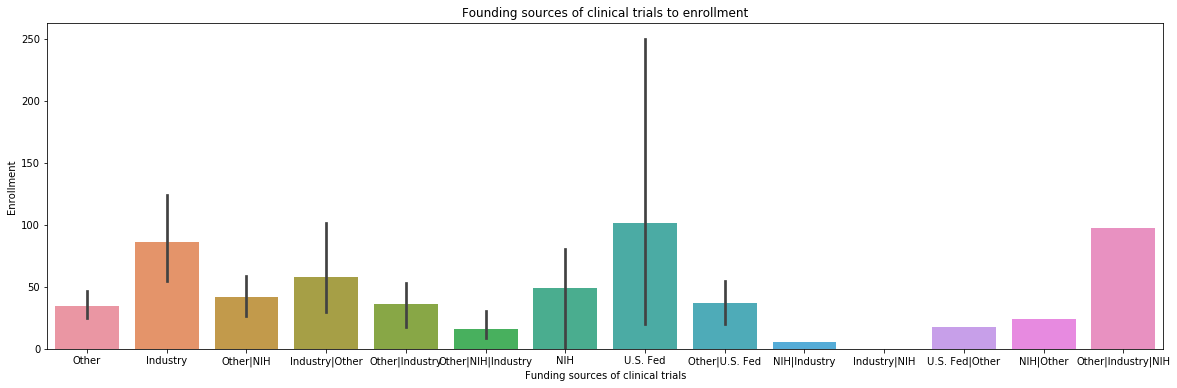

In [18]:
plt.figure(figsize=(20,6))
plt.title('Founding sources of clinical trials to enrollment')
sns.barplot(x=CT_data['FundedBys'], y=CT_data['Enrollment'], order = CT_data['FundedBys'].value_counts().index)
plt.xlabel('Funding sources of clinical trials')
plt.ylabel('Enrollment')

Next, I extrace the information of institution, city, and state from locations. That will let us know which state/city has most clinical trials of MSC. Florida, Texas, and Minnesota have most clinical trials

## Geospatial analysis

In [19]:
# extract institution, city, and state
address = CT_data.Locations # This column contains institution, city, address
instit=[] # institution
city=[] # city
state=[] # state
for a in address:
    asplit = a.split(",")
    instit.append(asplit[0])
    city.append(asplit[-3])
    state.append(asplit[-2].replace(" ", ""))

CT_data['Institution'] = instit
CT_data['City'] = city
CT_data['State'] = state

In [20]:
CT_data['State'].unique()

array(['Ohio', 'Texas', 'Florida', 'Illinois', 'Minnesota', 'Kansas',
       'Alabama', 'California', 'Maryland', 'SouthCarolina', 'Georgia',
       'Louisiana', 'Indiana', 'RhodeIsland', 'NewYork', 'NewJersey',
       'Pennsylvania', 'Colorado', 'Mississippi', 'Nevada',
       'DistrictofColumbia', 'Massachusetts', 'Utah', 'NorthCarolina',
       'Virginia', 'Tennessee', 'Hawaii', 'Missouri', 'Nebraska',
       'SouthDakota', 'NewMexico', 'Wisconsin', 'UK', 'Vermont',
       'Michigan', 'Ontario', 'Hamilton', 'Quebec', 'Washington',
       'London', 'Connecticut', 'Victoria'], dtype=object)

In [21]:
CT_data['State'].value_counts().iloc[:10]

Florida         30
Texas           29
Minnesota       24
Ohio            11
California      10
Maryland         9
NewYork          6
Pennsylvania     6
Utah             5
Wisconsin        5
Name: State, dtype: int64

In [22]:
CT_data['City'].value_counts().iloc[:10]

 Rochester         21
 Houston           21
 Miami             18
 Cleveland         10
 Atlanta            5
 Baltimore          5
 Jacksonville       5
 New York           5
 Salt Lake City     5
 Charleston         4
Name: City, dtype: int64

In [23]:
CT_data.Institution[CT_data['State']=='Florida'].value_counts()

Mayo Clinic in Florida                                         4
University of Miami Miller School of Medicine                  4
ISCI / University of Miami Miller School of Medicine           3
Z Urology                                                      2
ISCI / University of Miami                                     2
University of Miami                                            2
Andrews Institute                                              1
Interdisciplinary stem cell institute (ISCI)                   1
University of California                                       1
UCLA School of Medicine                                        1
Interdisciplinary Stem Cell Institute / University of Miami    1
ISCI/University of Miami Miller School of Medicine             1
University of Miami School of Medicine                         1
Trinity Stem Cell Institution                                  1
MD Stem Cells                                                  1
Univeristy of Miami Mille

In [24]:
CT_data.Institution[CT_data['State']=='Texas'].value_counts()

University of Texas MD Anderson Cancer Center                                   4
The University of Texas Health Science Center at Houston                        3
M D Anderson Cancer Center                                                      3
Clinical Trial Network                                                          3
Memorial Hermann Hospital-Clinical Research Unit (MMH-CRU)                      2
Indiana University Simon Cancer Center                                          1
University of Texas Health Science Center                                       1
Accurate Clinical Research                                                      1
University of Southern California Keck School of Medicine                       1
University of Southern California                                               1
Baylor Scott and White Research Institute                                       1
Hope Biosciences                                                                1
Baylor College o

In [25]:
CT_data.Institution[CT_data['State']=='Minnesota'].value_counts()

Mayo Clinic in Rochester                                            12
Mayo Clinic                                                          7
University of Minnesota Masonic Cancer Center and Medical Center     2
Massachusetts General Hospital                                       1
University of California Irvine Alpha Stem Cell Clinic               1
Children's Hospital of Alabama                                       1
Name: Institution, dtype: int64

Text(0, 0.5, 'Count')

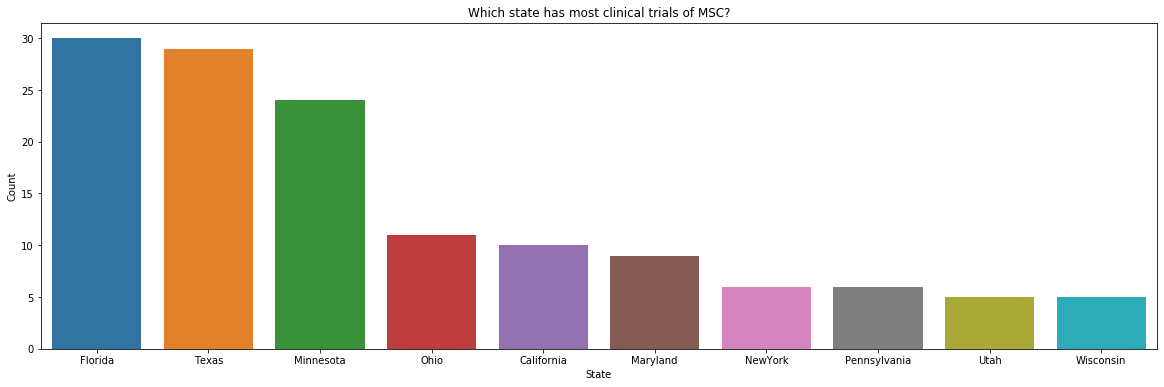

In [26]:
plt.figure(figsize=(20,6))
plt.title("Which state has most clinical trials of MSC?")
sns.countplot(x="State", data=CT_data, order = CT_data['State'].value_counts().iloc[:10].index)
plt.xlabel('State')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

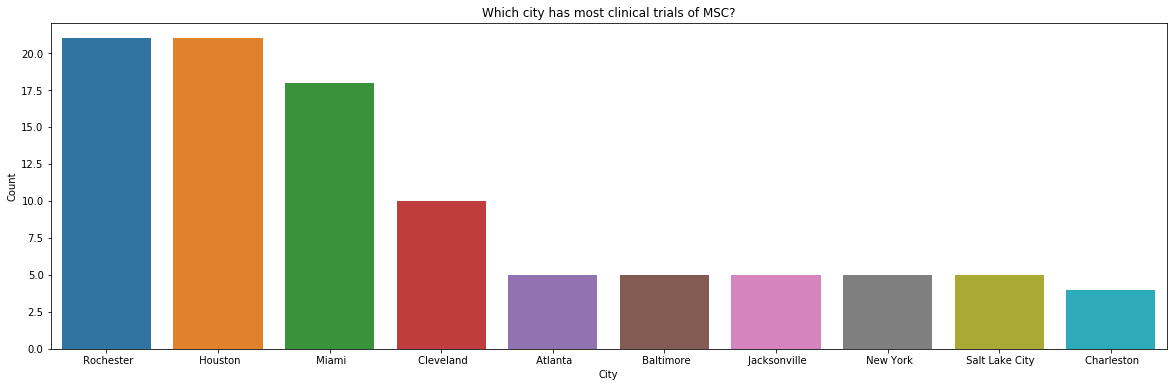

In [27]:
plt.figure(figsize=(20,6))
plt.title("Which city has most clinical trials of MSC?")
sns.countplot(x="City", data=CT_data, order = CT_data['City'].value_counts().iloc[:10].index)
plt.xlabel('City')
plt.ylabel('Count')

## Several things can be also analyzed such as outcome measures and conditions